[12.4, 17.2, 23.8, 34.2, 50.0, 70.8, 99.8, 140.4, 192.2]


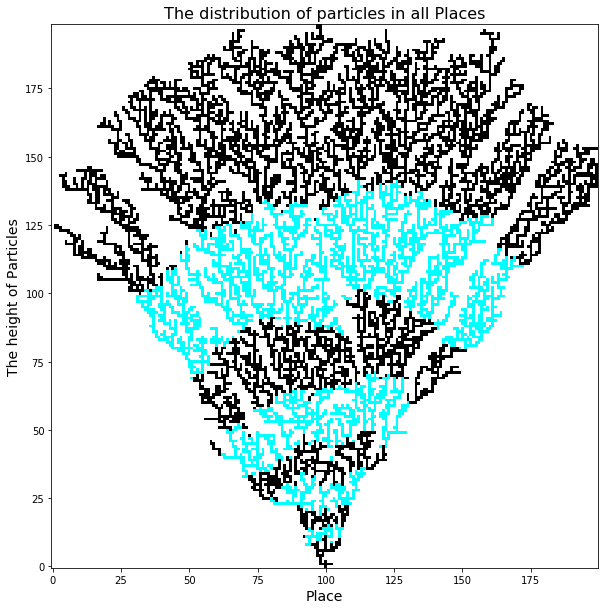

In [2]:
import numpy as np
import pylab as plb
import random as rand
from matplotlib import colors
plb.rcParams['figure.figsize'] = 18,10

N = 200   #L//L0   # The number of Rooms
t = 10000  # Hom many seeds?
d = 5      # Iteration of Code
StopNo = 8 #number of stops
cmap = colors.ListedColormap(['white', 'black','cyan'])
Samples = []
Diams = []
Stops = [t//(2**k) for k in range(StopNo,-1,-1)]


def Visualize(*args):
    global StopNo
    global Stops
    for ar in args:
        for li in ar:
            li.remove(0)
    Cuts = []
    for i,f in enumerate(args):
        if i == 0:
            Cuts.append(f[:])
        else:
            Cuts.append([])
            for h,elem in enumerate(f): 
                NewArray = np.array(elem[len(args[i-1][h]):])
                NewArray[NewArray == 1] = i%2 +1
                Cuts[-1].append(NewArray.tolist())
    Data = []
    for i in range(N):
        TempArr = []
        for f in Cuts:
            TempArr += f[i]
        Data.append(TempArr)
    global cmap
    maX = max([len(dt) for dt in Data])
    for dat in Data:
        while len(dat)<maX:
            dat.append(0)
    plb.imshow(np.array(Data).T,cmap=cmap,origin= [0,1])

    plb.title("The distribution of particles in all Places",fontsize=16)
    plb.xlabel("Place",fontsize=14)
    plb.ylabel("The height of Particles",fontsize=14)
    plb.show()
    
def Find_Valids(Rooms,N):
    """To find the Columns that can be rained"""
    vlr = []
    
    for j in range(0,N):
        if 1 in Rooms[j]:
            vlr.append(j)
    
    minV , maxV = min(vlr) , max(vlr)
    
    if maxV < N-1 :
        vlr.append(maxV+1)
    if minV > 0 :
        vlr.append(minV-1)
    
    return vlr
    


def Find_Near(r,N,Rooms):
    """To choose the Place for sitting"""
    
    NeighboursHeight = { len(Rooms[r-1]) , len(Rooms[r]), len(Rooms[(r+1)%N]) }

    maxh = max(NeighboursHeight)
    
    if len(Rooms[r]) == maxh:
        return 1
    elif maxh == len(Rooms[r-1]):
        return len(Rooms[r-1])-len(Rooms[r])
    else:
        return len(Rooms[(r+1)%N])-len(Rooms[r])



"""New kind of sample is like a matrix with 0 and 1 entities
   First Element is the last row so we need some matrix operation for visualization
   Let's do it
"""



for Iterations in range(0,d):
    Rooms = [ [0] for i in range(N)]
    Rooms[N//2] = [0,1,1]
    Diams.append([])
    Samples = []
    for i in range(t+1):
        
        validRooms = Find_Valids(Rooms,N)
        r = rand.choice(validRooms)
        ind = Find_Near(r,N,Rooms)
        for j in range(ind-1):
            Rooms[r].append(0)
        Rooms[r] .append(1)
        if i in Stops:

            Samples.append([[Y for Y in X] for X in Rooms])    #Cloner :)
            Diams[-1].append(max(validRooms)-min(validRooms))
AvgDiameter =[]
for j in range(StopNo+1):
        AvgDiameter.append(sum([num[j] for num in Diams])/d) 
#AvgDiameter  is average diameter of the tree afted d times running
Visualize(*Samples)


The equation is : h = 3.172*x^0.501


Text(0, 0.5, 'log(Diam) (The diameter of tree)')

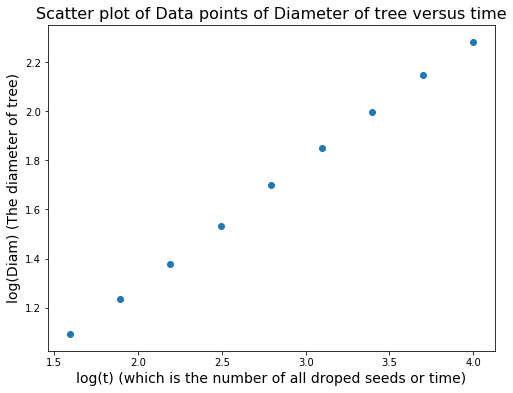

In [3]:
plb.rcParams['figure.figsize'] = 8,6
Data =[]
for r in range(StopNo+1):
    Data.append( (Stops[r], AvgDiameter[r]) )

Xs = np.array([d[0] for d in Data])
Ys = np.array([d[1] for d in Data])
Xs = np.log10(Xs)
Ys = np.log10(Ys)
Coeff = np.polyfit(Xs,Ys,1)
print( 'The equation is : h = {:.3f}*x^{:.3f}'.format(10**(Coeff[0]),Coeff[0]))

plb.scatter(Xs,Ys)
plb.title("Scatter plot of Data points of Diameter of tree versus time",fontsize=16)
plb.xlabel("log(t) (which is the number of all droped seeds or time)",fontsize=14)
plb.ylabel("log(Diam) (The diameter of tree)",fontsize=14)